In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('loan_application.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Finding:

1.there are total 614 rows and 13 columns are presents
2.null values present in the dataset

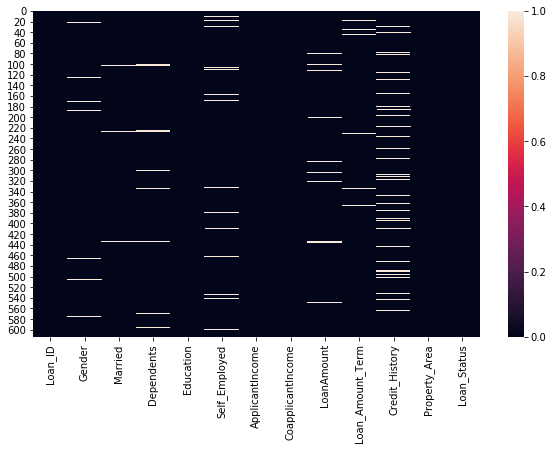

In [6]:
#checking for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
col=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for i in col:
    print(i)
    print(df[i].value_counts())
    print('--------------------------------------')


Gender
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------
Married
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
--------------------------------------
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
--------------------------------------


In [11]:
#Imputing the missing value with mode 

for i in col:
    df[i].fillna(df[i].mode()[0], inplace=True)

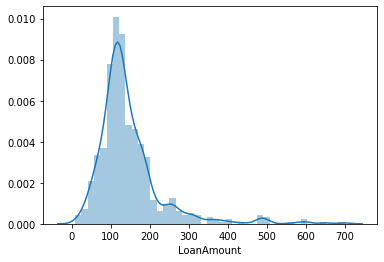

In [12]:
sns.distplot(df['LoanAmount'])

skewed data so we take missing values with median

In [13]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

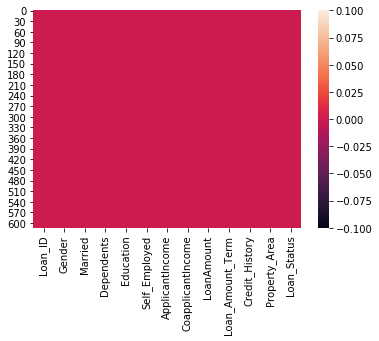

In [15]:
sns.heatmap(df.isnull())
plt.show()

no null values are present in the dataset

In [16]:
# Converting target values to 0 and 1 
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,0
143,LP001507,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,1
255,LP001846,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,128.0,360.0,1.0,Urban,1


In [17]:
#statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Observation:

1. In mostly feature mean is greater than or eqlua to median mean mostly numerical fetaure right right skewed.
2. Difference between 75% and max in Applicantincome very huge seems to have outliers.

In [18]:
#check correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000


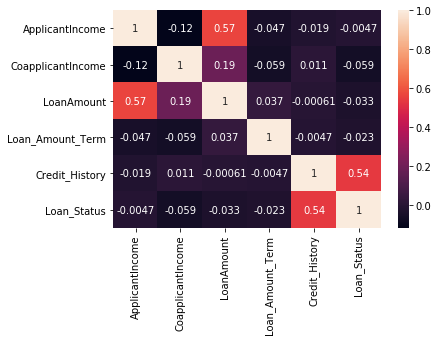

In [19]:
sns.heatmap(df.corr(),annot=True)

findings:
    
    1)credit history is positively correlated to target variable
    2)loan amount and applicant income are positively related
    

In [20]:
#drop id beacuse it has no interpretation.
df.drop(columns=['Loan_ID'], axis=1, inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
df.shape

(614, 12)

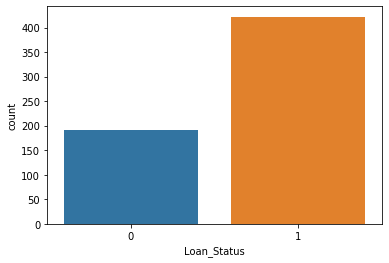

In [22]:
sns.countplot('Loan_Status',data=df)

findings: in most of the cases loan will approved

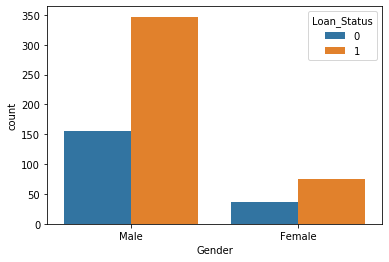

In [23]:
sns.countplot(x='Gender', data=df,hue='Loan_Status')

data shows male are high chance to approve loan

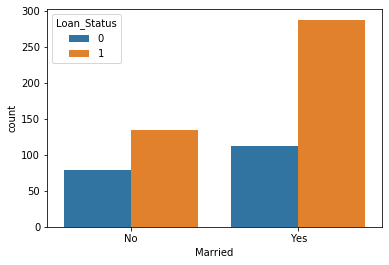

In [24]:
sns.countplot(x='Married', data=df,hue='Loan_Status')

number of approved cases in married status is high

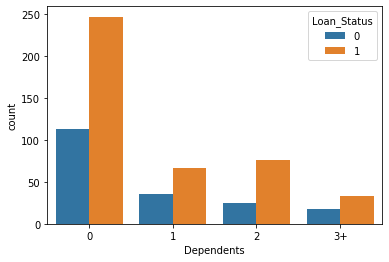

In [25]:
sns.countplot(x='Dependents', data=df,hue='Loan_Status')

most of the approved cases in 0 sepents on applicants

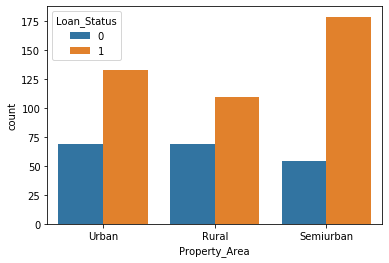

In [26]:
sns.countplot(x='Property_Area', data=df,hue='Loan_Status')

Semiurban has max number of approved loan

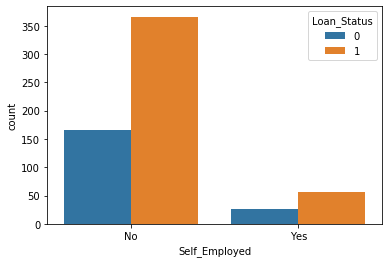

In [27]:
sns.countplot(x='Self_Employed', data=df,hue='Loan_Status')

max number of approved in not having self employed

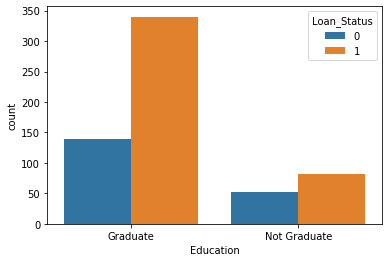

In [28]:
sns.countplot(x='Education', data=df,hue='Loan_Status')

max number of approved loan in case of graduate

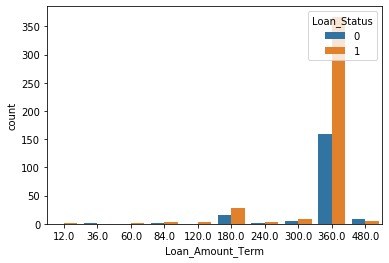

In [29]:
sns.countplot(x='Loan_Amount_Term', data=df,hue='Loan_Status')

loan amount term is 360 then max number of loan aprroved

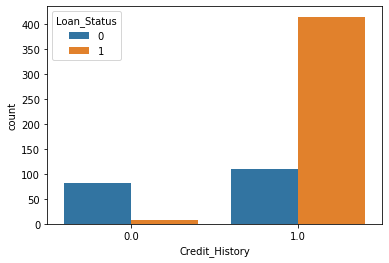

In [30]:
sns.countplot(x='Credit_History', data=df,hue='Loan_Status')

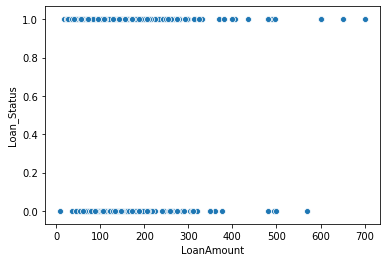

In [31]:
sns.scatterplot(x='LoanAmount', data=df,y='Loan_Status')

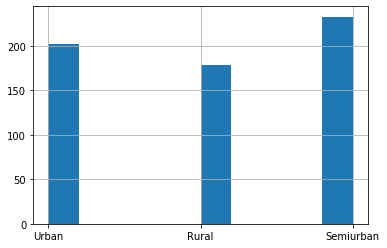

In [32]:
df['Property_Area'].hist()

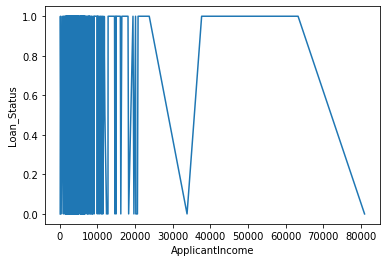

In [33]:
sns.lineplot(x='ApplicantIncome', data=df,y='Loan_Status')

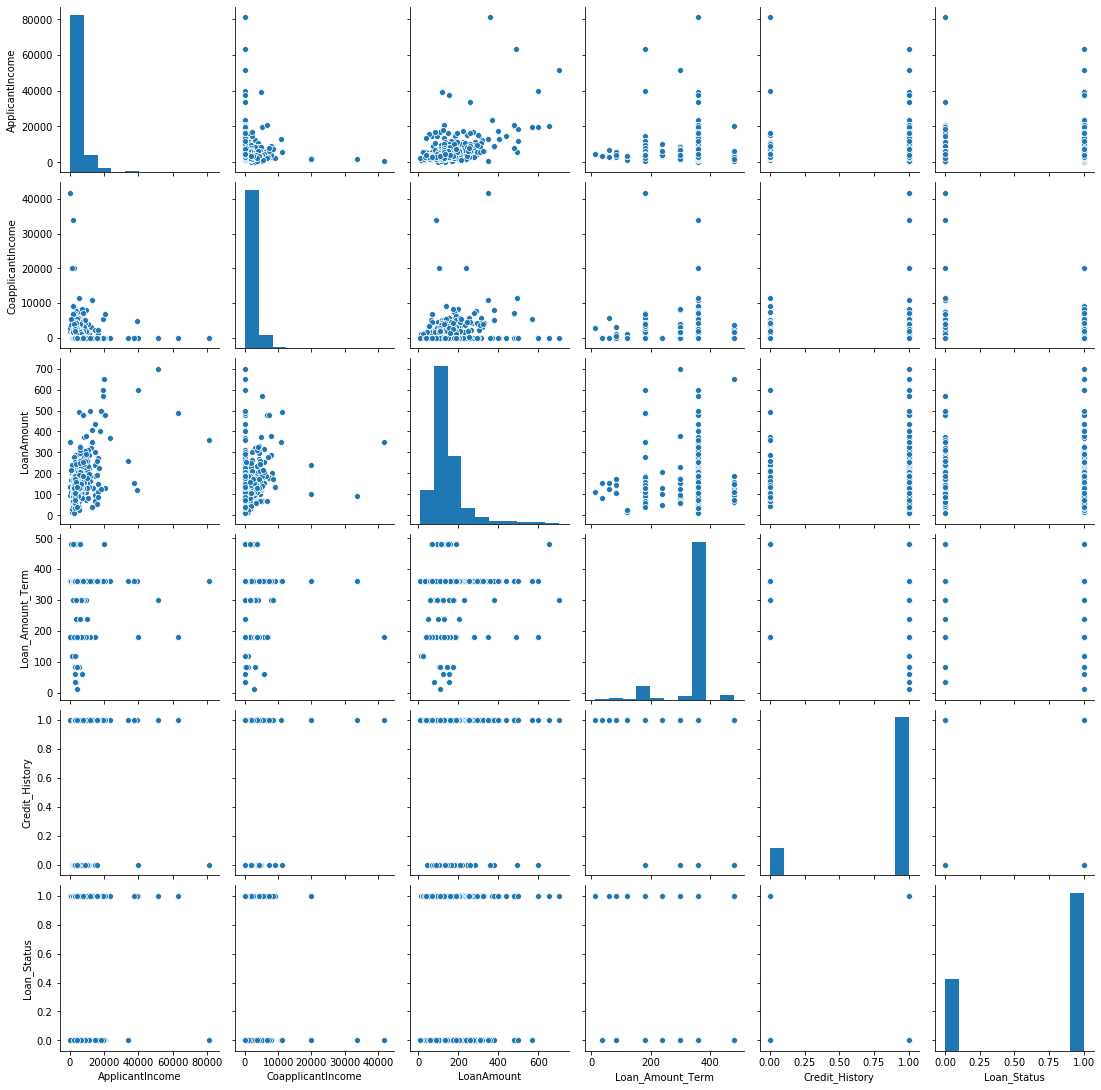

In [34]:
sns.pairplot(df)

In [35]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,275,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,431,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,422,0.0,187.0,360.0,1.0,2,1


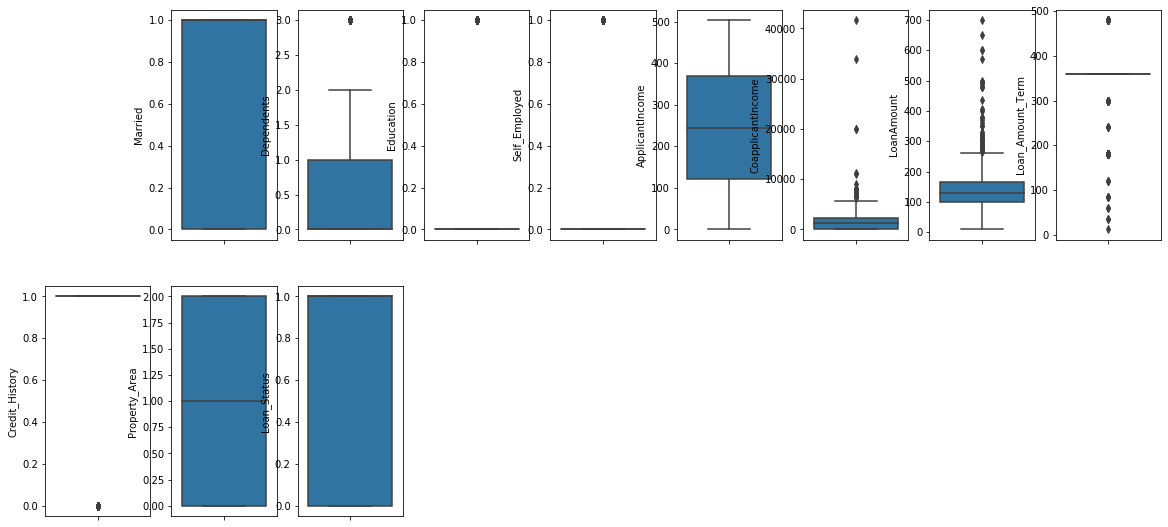

In [37]:
#cheking for outliers:


collist=df.columns.values
plt.figure(figsize=(20,50))
for i in range(1,len(collist)):
    plt.subplot(10,9,i+1)
    sns.boxplot(df[collist[i]],orient='v')
    plt.tight_layout

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)
df_new=df[(z<3).all(axis=1)]

In [39]:
df=df_new
df.shape

(582, 12)

In [40]:
df.skew()

Gender              -1.636555
Married             -0.636160
Dependents           1.044261
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      0.044622
CoapplicantIncome    1.348959
LoanAmount           1.232246
Loan_Amount_Term    -2.112269
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

In [41]:
#Lets treat the skewness
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [42]:
#Again check skewness
df.skew()

Gender              -1.636555
Married             -0.636160
Dependents           0.598949
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      0.044622
CoapplicantIncome    0.217282
LoanAmount           0.423362
Loan_Amount_Term    -2.587894
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

In [43]:
#Splitting the data into input and output variable.
x=df.drop(columns=['Loan_Status'],axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,376,0.000000,11.313708,7.113787,1.0,2
1,1.0,1.0,1.0,0.0,0.0,306,38.832976,11.313708,7.113787,1.0,0
2,1.0,1.0,0.0,0.0,1.0,139,0.000000,8.124038,7.113787,1.0,2
3,1.0,1.0,0.0,1.0,0.0,90,48.559242,10.954451,7.113787,1.0,2
4,1.0,0.0,0.0,0.0,0.0,381,0.000000,11.874342,7.113787,1.0,2


In [44]:
y=df['Loan_Status']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [45]:
# Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x.shape

(582, 11)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)
print('xtrain shape--->',x_train.shape)
print('ytrain shape--->',y_train.shape)
print('xtest shape--->',x_test.shape)
print('ytest shape--->',y_test.shape)

xtrain shape---> (453, 11)
ytrain shape---> (453,)
xtest shape---> (129, 11)
ytest shape---> (129,)


In [47]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score              
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Using Grid Search to check the best parameters
from sklearn.model_selection import GridSearchCV

In [48]:
#grid search cv for logistic regression classifier
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 0.01}

In [49]:
#logistic regression
lr=LogisticRegression(C=0.01)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
score_lr=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr=scorelr.mean()

Accuracy Score: 0.8294573643410853
[[21 18]
 [ 4 86]]
              precision    recall  f1-score   support

         0.0       0.84      0.54      0.66        39
         1.0       0.83      0.96      0.89        90

    accuracy                           0.83       129
   macro avg       0.83      0.75      0.77       129
weighted avg       0.83      0.83      0.82       129

_________________________________________________
cross validation
Score of LogisticRegression(C=0.01) is:
[0.81355932 0.81355932 0.79310345 0.77586207 0.77586207 0.79310345
 0.87931034 0.86206897 0.79310345 0.87931034]
Mean: 0.8178842781998832
Std: 0.0386134965274495


In [50]:
#gridSearchCV for decision tree
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy'}

In [51]:
#Using DescisionTreeClassifier()
dtc=DecisionTreeClassifier(criterion=('gini'))
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
score_dtc=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc=scoredtc.mean()

Accuracy Score: 0.7751937984496124
[[27 12]
 [17 73]]
              precision    recall  f1-score   support

         0.0       0.61      0.69      0.65        39
         1.0       0.86      0.81      0.83        90

    accuracy                           0.78       129
   macro avg       0.74      0.75      0.74       129
weighted avg       0.78      0.78      0.78       129

_________________________________________________
cross validation
Score of DecisionTreeClassifier() is:
[0.77966102 0.6779661  0.60344828 0.65517241 0.62068966 0.75862069
 0.72413793 0.70689655 0.75862069 0.75862069]
Mean: 0.7043834015195791
Std: 0.05932997963099369


In [52]:
#gridSearchCV for knn
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 9}

In [53]:
#knn
knc=KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
score_knc=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn=scoreknc.mean()

Accuracy Score: 0.7906976744186046
[[17 22]
 [ 5 85]]
              precision    recall  f1-score   support

         0.0       0.77      0.44      0.56        39
         1.0       0.79      0.94      0.86        90

    accuracy                           0.79       129
   macro avg       0.78      0.69      0.71       129
weighted avg       0.79      0.79      0.77       129

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=9) is:
[0.81355932 0.83050847 0.79310345 0.77586207 0.75862069 0.77586207
 0.86206897 0.86206897 0.79310345 0.86206897]
Mean: 0.8126826417299824
Std: 0.03746524959059044


In [54]:
#Using Grid Search to check the best parameters for SVM
svc=SVC()
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [55]:
#Using SVC() from SVM

svc=SVC(kernel='linear',C=1)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
score_svc=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=15)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc=scoresvc.mean()

0.8294573643410853
[[21 18]
 [ 4 86]]
              precision    recall  f1-score   support

         0.0       0.84      0.54      0.66        39
         1.0       0.83      0.96      0.89        90

    accuracy                           0.83       129
   macro avg       0.83      0.75      0.77       129
weighted avg       0.83      0.83      0.82       129

_________________________________________________
cross validation
Score of SVC(C=1, kernel='linear') is:
[0.82051282 0.84615385 0.76923077 0.82051282 0.76923077 0.79487179
 0.74358974 0.79487179 0.82051282 0.84615385 0.8974359  0.84615385
 0.73684211 0.92105263 0.84210526]
Mean: 0.817948717948718
Std: 0.05023808948280221


In [56]:
#grid search cv for Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [57]:
#Using Random Forest Classifier

rf=RandomForestClassifier(criterion='gini', random_state=45,n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
score_rf=accuracy_score(y_test,predrf)
print('accuracy score:',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
print('_________________________________________________')
print('cross validation')
scorerf=cross_val_score(rf,x,y,cv=10)
print('Score of',rf,'is:')
print(scorerf)
print('Mean:',scorerf.mean())
print('Std:',scorerf.std())
cv_rf=scorerf.mean()

accuracy score: 0.7906976744186046
[[21 18]
 [ 9 81]]
              precision    recall  f1-score   support

         0.0       0.70      0.54      0.61        39
         1.0       0.82      0.90      0.86        90

    accuracy                           0.79       129
   macro avg       0.76      0.72      0.73       129
weighted avg       0.78      0.79      0.78       129

_________________________________________________
cross validation
Score of RandomForestClassifier(random_state=45) is:
[0.79661017 0.77966102 0.77586207 0.75862069 0.77586207 0.82758621
 0.86206897 0.77586207 0.77586207 0.84482759]
Mean: 0.7972822910578609
Std: 0.03319213720604467


In [58]:
#gaussion NB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
score_gnb=accuracy_score(y_test,predgnb)
print("Accuracy Score:",accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))
print('_________________________________________________')
print('cross validation')
scoregnb=cross_val_score(gnb,x,y,cv=10)
print('Score of',gnb,'is:')
print(scoregnb)
print('Mean:',scoregnb.mean())
print('Std:',scoregnb.std())
cv_gnb=scoregnb.mean()

Accuracy Score: 0.8294573643410853
[[21 18]
 [ 4 86]]
              precision    recall  f1-score   support

         0.0       0.84      0.54      0.66        39
         1.0       0.83      0.96      0.89        90

    accuracy                           0.83       129
   macro avg       0.83      0.75      0.77       129
weighted avg       0.83      0.83      0.82       129

_________________________________________________
cross validation
Score of GaussianNB() is:
[0.81355932 0.81355932 0.79310345 0.77586207 0.77586207 0.79310345
 0.87931034 0.86206897 0.79310345 0.87931034]
Mean: 0.8178842781998832
Std: 0.0386134965274495


In [59]:
# our target variable is imbalance so we use resampling techniue to balance it then we will use model buildings
#under sampling

In [60]:
from imblearn.under_sampling import NearMiss
from collections import Counter
Counter(y_train)

Counter({1.0: 311, 0.0: 142})

In [61]:
ns = NearMiss()
x_train_ns,y_train_ns = ns.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1.0: 311, 0.0: 142})
The number of classes after fit Counter({0.0: 142, 1.0: 142})


In [62]:
#grid search cv for logistic regression classifier under sampling
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_ns,y_train_ns)
clf.best_params_

{'C': 1}

In [63]:
#logistic regression for under sampling 
lr=LogisticRegression(C=1)
lr.fit(x_train_ns,y_train_ns)
lr.score(x_train_ns,y_train_ns)
predlr=lr.predict(x_test)
score_lr_ns=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr_ns=scorelr.mean()

Accuracy Score: 0.5891472868217055
[[24 15]
 [38 52]]
              precision    recall  f1-score   support

         0.0       0.39      0.62      0.48        39
         1.0       0.78      0.58      0.66        90

    accuracy                           0.59       129
   macro avg       0.58      0.60      0.57       129
weighted avg       0.66      0.59      0.61       129

_________________________________________________
cross validation
Score of LogisticRegression(C=1) is:
[0.81355932 0.81355932 0.79310345 0.77586207 0.77586207 0.79310345
 0.87931034 0.86206897 0.79310345 0.87931034]
Mean: 0.8178842781998832
Std: 0.0386134965274495


In [64]:
#Using Grid Search to check the best parameters for SVM for under sampling 
svc=SVC()
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_ns,y_train_ns)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [65]:
#Using SVC() from SVM for under sampling 

svc=SVC(kernel='rbf',C=1)
svc.fit(x_train_ns,y_train_ns)
predsvc=svc.predict(x_test)
score_svc_ns=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=10)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc_ns=scoresvc.mean()

0.5736434108527132
[[27 12]
 [43 47]]
              precision    recall  f1-score   support

         0.0       0.39      0.69      0.50        39
         1.0       0.80      0.52      0.63        90

    accuracy                           0.57       129
   macro avg       0.59      0.61      0.56       129
weighted avg       0.67      0.57      0.59       129

_________________________________________________
cross validation
Score of SVC(C=1) is:
[0.81355932 0.81355932 0.79310345 0.77586207 0.77586207 0.79310345
 0.87931034 0.86206897 0.79310345 0.87931034]
Mean: 0.8178842781998832
Std: 0.0386134965274495


In [66]:
#over sample

In [67]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit ",(Counter(y_train)))
print("The number of classes after fit ",(Counter(y_train_os)))

The number of classes before fit  Counter({1.0: 311, 0.0: 142})
The number of classes after fit  Counter({1.0: 311, 0.0: 311})


In [68]:
#grid search cv for logistic regression classifier over sample
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'C': 0.01}

In [69]:
#logistic regression over sample
lr=LogisticRegression(C=0.1)
lr.fit(x_train_os,y_train_os)
lr.score(x_train_os,y_train_os)
predlr=lr.predict(x_test)
score_lr_os=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr_os=scorelr.mean()

Accuracy Score: 0.7674418604651163
[[23 16]
 [14 76]]
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.61        39
         1.0       0.83      0.84      0.84        90

    accuracy                           0.77       129
   macro avg       0.72      0.72      0.72       129
weighted avg       0.76      0.77      0.77       129

_________________________________________________
cross validation
Score of LogisticRegression(C=0.1) is:
[0.81355932 0.81355932 0.79310345 0.77586207 0.77586207 0.79310345
 0.87931034 0.86206897 0.79310345 0.87931034]
Mean: 0.8178842781998832
Std: 0.0386134965274495


In [70]:
#gridSearchCV for decision tree for over sample
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=10)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'criterion': 'entropy'}

In [71]:
#Using DescisionTreeClassifier() for over sample
dtc=DecisionTreeClassifier(criterion=('gini'))
dtc.fit(x_train_os,y_train_os)
dtc.score(x_train_os,y_train_os)
preddtc=dtc.predict(x_test)
score_dtc_os=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc_os=scoredtc.mean()

Accuracy Score: 0.6976744186046512
[[25 14]
 [25 65]]
              precision    recall  f1-score   support

         0.0       0.50      0.64      0.56        39
         1.0       0.82      0.72      0.77        90

    accuracy                           0.70       129
   macro avg       0.66      0.68      0.67       129
weighted avg       0.73      0.70      0.71       129

_________________________________________________
cross validation
Score of DecisionTreeClassifier() is:
[0.77966102 0.69491525 0.56896552 0.70689655 0.63793103 0.75862069
 0.75862069 0.75862069 0.74137931 0.74137931]
Mean: 0.7146990064289889
Std: 0.06246193189047605


In [72]:
#gridSearchCV for knn for over sample
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=10)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'n_neighbors': 1}

In [73]:
#knn for over sample
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(x_train_os,y_train_os)
knc.score(x_train_os,y_train_os)
predknc=knc.predict(x_test)
score_knn_os=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn_os=scoreknc.mean()

Accuracy Score: 0.7441860465116279
[[20 19]
 [14 76]]
              precision    recall  f1-score   support

         0.0       0.59      0.51      0.55        39
         1.0       0.80      0.84      0.82        90

    accuracy                           0.74       129
   macro avg       0.69      0.68      0.68       129
weighted avg       0.74      0.74      0.74       129

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=1) is:
[0.71186441 0.69491525 0.68965517 0.70689655 0.75862069 0.68965517
 0.63793103 0.75862069 0.68965517 0.74137931]
Mean: 0.7079193454120398
Std: 0.03513636518692791


In [74]:
#Using Grid Search to check the best parameters for SVM for over sample
svc=SVC()
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'C': 10, 'kernel': 'poly'}

In [75]:
#Using SVC() from SVM for over sample
 
svc=SVC(kernel='poly',C=10)
svc.fit(x_train_ns,y_train_ns)
predsvc=svc.predict(x_test)
score_svc_os=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=10)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc_os=scoresvc.mean()

0.6201550387596899
[[24 15]
 [34 56]]
              precision    recall  f1-score   support

         0.0       0.41      0.62      0.49        39
         1.0       0.79      0.62      0.70        90

    accuracy                           0.62       129
   macro avg       0.60      0.62      0.60       129
weighted avg       0.68      0.62      0.63       129

_________________________________________________
cross validation
Score of SVC(C=10, kernel='poly') is:
[0.77966102 0.74576271 0.75862069 0.75862069 0.70689655 0.81034483
 0.79310345 0.72413793 0.72413793 0.81034483]
Mean: 0.7611630625365283
Std: 0.034837806514233016


In [76]:
#we are getting best score in imbalanced attribute so will use best score from imbalanced dataset

In [77]:
d={'model':['logistic regression','gaussion nb','svc','knc','random forest'],
   'score':[score_lr,score_gnb,score_svc,score_knc,score_rf],
   'cv_score':[cv_lr,cv_gnb,cv_svc,cv_knn,cv_rf]}
table=pd.DataFrame(data=d)
table

,model,score,cv_score
0,logistic regression,0.829457,0.817884
1,gaussion nb,0.829457,0.817884
2,svc,0.829457,0.817949
3,knc,0.790698,0.812683
4,random forest,0.790698,0.797282


In [78]:
#we can see that logistic regression has best accuracy score with less difference in with cross validation score

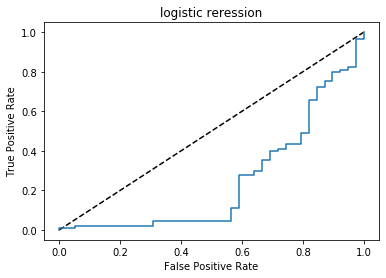

0.7170940170940171


In [79]:
#AUC_ROC Curve of random forest classifier for over sample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,:1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic reression')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

In [80]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(lr,'loan_prediction.pkl')

['loan_prediction.pkl']